<a href="https://colab.research.google.com/github/Sandeshwebdev1999/EDA_python/blob/main/Cardiovascular_risk_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    -  **Cardiovascular_risk Data Prediction**



____

##### **Project Type**    - Classification



____

##### **Contribution**    - Individual
##Student Name : **Sandesh Ingle**

____

# **Project Summary -**

#### This dataset contains health data of 3,390 individuals, including features like age, smoking status, cholesterol levels, and blood pressure, with the target variable being **TenYearCHD** (whether the individual has coronary heart disease).

**Key Points:**
- **Features**: Age, sex, smoking, blood pressure, cholesterol, BMI, glucose, etc.

- **Missing Data**: Some columns have missing values (e.g., `education`, `cigsPerDay`, `glucose`).

- **Objective**: Predict the risk of coronary heart disease (TenYearCHD) based on other health parameters using machine learning.

- **Steps**: Handle missing data, encode categorical variables, and build predictive models.


### **The goal is to analyze the factors influencing heart disease risk and develop a predictive model for early detection.**

_____

# **GitHub Link -**

Provide your GitHub Link here.


---

# **Problem Statement**


#### The objective of this project is to predict the likelihood of an individual developing coronary heart disease (CHD) within 10 years based on various health-related factors such as age, blood pressure, cholesterol levels, smoking habits, and other medical conditions. The dataset includes both categorical and numerical features, with some missing values.

#### By utilizing machine learning techniques, the goal is to build an accurate model that can predict the target variable **TenYearCHD** (whether an individual will develop heart disease) and identify key risk factors associated with cardiovascular health. This can help in early detection and prevention strategies for individuals at risk of heart disease.

____

# ***Let's Begin !***

---

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew
from scipy.stats import pearsonr

---

### Dataset Loading

In [2]:
# Load Dataset
path = '/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv'
df=pd.read_csv(path)

---

### Dataset First View

In [3]:
# # Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


---

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

---

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

___

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

---

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


___

### What did we know about this dataset?

In [8]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,2879
1,511


- **Columns:**

1. **'id'**: A unique identifier for each individual in the dataset.

2. **'age'**: The age of the individual.

3. **'education'**: The level of education attained by the individual in float.

4. **'sex'**: The gender of the individual (male or female).

5. **'is_smoking'**: The individual smokes (binary: Yes or No).

6. **'cigsPerDay'**: The number of cigarettes the individual smokes per day.

7. **'BPMeds'**: Whether the individual takes blood pressure medications (binary: Yes or No).

8. **'prevalentStroke'**: Whether the individual has a history of stroke (binary: Yes or No).

9. **'prevalentHyp'**: Whether the individual has hypertension (binary: Yes or No).

10. **'diabetes'**: Whether the individual has diabetes (binary: Yes or No).

11. **'totChol'**: The total cholesterol level of the individual (numerical).

12. **'sysBP'**: The systolic blood pressure of the individual (numerical).

13. **'diaBP'**: The diastolic blood pressure of the individual (numerical).

14. **'BMI'**: The Body Mass Index of the individual (numerical).

15. **'heartRate'**: The individual's heart rate (numerical).

16. **'glucose'**: The individual's blood glucose level (numerical).

17. **'TenYearCHD'**: Whether the individual has a 10-year risk of coronary heart disease (binary: Yes or No).

### Key Insights:
- The dataset seems to focus on factors that influence heart disease and related conditions, such as smoking, blood pressure, cholesterol, diabetes, and BMI.
- The target variable could be **'TenYearCHD'**, which likely represents whether or not an individual is at risk of coronary heart disease within the next ten years.
- This dataset can be used for risk modeling, health trend analysis, and predictive analytics, especially for cardiovascular diseases.


___



## ***2. Understanding Variables***

In [10]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

____

In [11]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


____

In [12]:
# Check Unique Values for each variable.
unique_counts = df.nunique()
unique_counts

,0
id,3390
age,39
education,4
sex,2
is_smoking,2
cigsPerDay,32
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2


___

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Age vs. Health Conditions:**

### **Objective:**
####The objective of the boxplot is to examine the relationship between age and the risk of developing heart disease over a 10-year period, as indicated by the TenYearCHD variable.

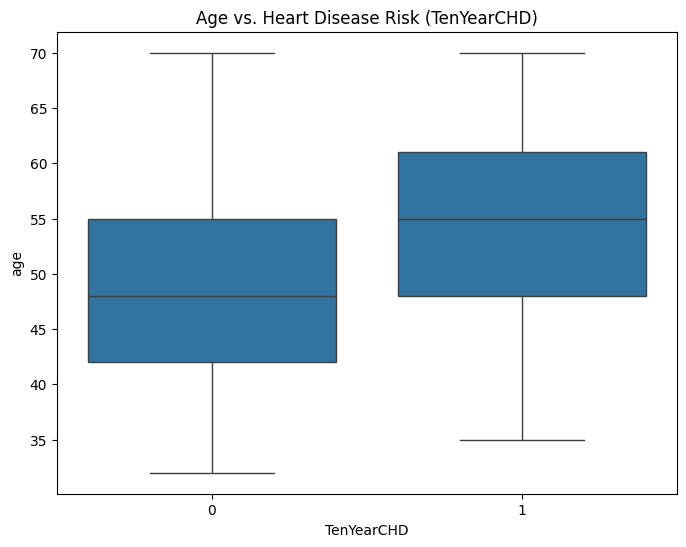

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="TenYearCHD", y="age", data=df)
plt.title('Age vs. Heart Disease Risk (TenYearCHD)')
plt.grid(False)
plt.show()

### **Key Insights:**

#### **The boxplot provides a clear visual summary of how age relates to heart disease risk.**

**Age Distribution :**

The plot reveals how age is distributed between individuals who developed heart disease (TenYearCHD = 1) and those who did not (TenYearCHD = 0).

**Median Age :**

The median age of individuals with heart disease is typically higher, suggesting that older age may be associated with an increased risk of developing heart disease.





____

### **Sex (gender) and Health Conditions :**

### **Objective:**
#### Objective of this analysis is to understand the relationship between sex and the risk of developing heart disease (as indicated by TenYearCHD).

In [14]:
heart_disease_counts = df.groupby(['sex', 'TenYearCHD']).size().reset_index(name='count')
heart_disease_counts

,sex,TenYearCHD,count
0,F,0,1684
1,F,1,239
2,M,0,1195
3,M,1,272


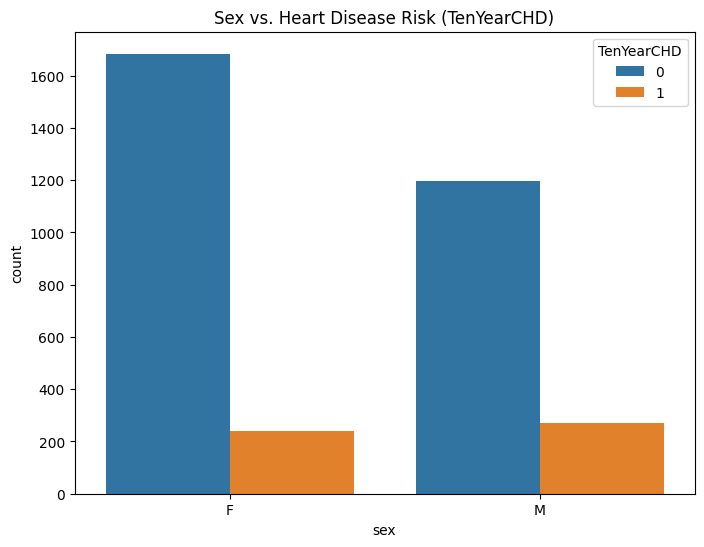

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x="sex", hue="TenYearCHD", data=df)
plt.title('Sex vs. Heart Disease Risk (TenYearCHD)')
plt.grid(False)
plt.show()

### **Key Insights:**

#### **Heart Disease Prevalence by Sex:**

####**Females:**
1684 females did not develop heart disease (TenYearCHD = 0).

239 females developed heart disease (TenYearCHD = 1).

####**Males:**
1195 males did not develop heart disease (TenYearCHD = 0).

272 males developed heart disease (TenYearCHD = 1).


#### **Comparison of Total Numbers:**

There are more females in the dataset who did not develop heart disease compared to males (1684 females vs. 1195 males).

However, the total number of females (1684 + 239 = 1923) is larger than the total number of males (1195 + 272 = 1467). This suggests that there are more females overall in the dataset.

#### **Insight on Gender and Heart Disease Risk:**

The proportion of males who developed heart disease (18.6%) is higher than the proportion of females who developed heart disease (12.4%).

Although there are more females in the dataset, males have a higher rate of heart disease risk compared to females.

This suggests that males may be more vulnerable to developing heart disease relative to their total population in this dataset.

### **Conclusion:**
#### Heart disease risk is higher in males relative to the total number of males in the dataset.

#### There are more females who did not develop heart disease, but the relative proportion of heart disease cases is higher in males.

#### The findings could be used to investigate further into risk factors like age, smoking habits, BMI, or other health conditions to understand why males have a higher rate of heart disease in this dataset.

____

### **Glucose and Diabetes Risk:**

### **Objective:**
The **objective** of this analysis is to examine the relationship between **diabetes** and **glucose levels**. By using a boxplot, the goal is to visualize the distribution of glucose levels in individuals with and without diabetes, helping to identify any significant differences in glucose values across these two groups. This can provide insights into how glucose levels vary between diabetic and non-diabetic individuals, highlighting glucose as a potential indicator for diabetes.

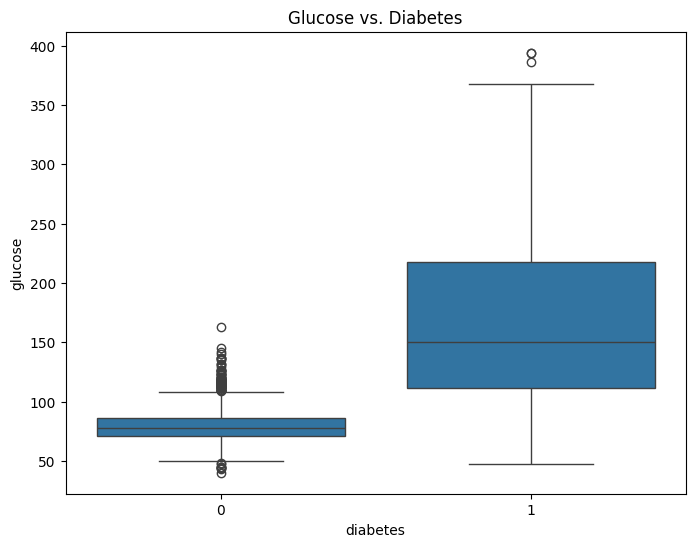

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="diabetes", y="glucose", data=df)
plt.title('Glucose vs. Diabetes')
plt.grid(False)
plt.show()

### **Key Insights:**

The **analysis** found from the boxplot of **glucose vs. diabetes** can be summarized as follows:

1. **Glucose Distribution in Diabetic vs. Non-Diabetic Individuals**:
   - **Diabetic group**: The glucose levels for individuals with diabetes are generally higher, with a wider range and possibly more outliers indicating higher variability in glucose levels.
   - **Non-diabetic group**: The glucose levels for non-diabetic individuals tend to be lower and more tightly clustered, suggesting less variability and lower average glucose levels.
   
2. **Median Glucose Levels**: The median glucose level for individuals with diabetes is likely higher than for those without diabetes, supporting the idea that elevated glucose is a key characteristic of diabetes.

3. **Spread of Glucose Levels**:
   - The spread (i.e., the interquartile range) for the diabetic group may be wider, indicating that some individuals with diabetes have significantly higher glucose levels, while the non-diabetic group likely has lower glucose levels in general.

### Insight:
This boxplot provides visual evidence that **glucose levels are typically higher in individuals with diabetes**, confirming that glucose levels could serve as an important indicator for the presence of diabetes. It helps in understanding how glucose varies between diabetic and non-diabetic individuals, which could be valuable for monitoring and diagnosing diabetes.

### **Conclusion:**
####The **conclusion** from the boxplot is that **glucose levels are significantly higher in individuals with diabetes** compared to those without. This highlights glucose as an important indicator for diagnosing and monitoring diabetes, with diabetic individuals showing greater variability and higher median glucose levels.

____

### **Identifying Key Predictors of Heart Disease Risk:**

### **Objective:**
#### The **objective** of this analysis is to visualize and explore the relationships between selected features (such as age, smoking habits, cholesterol levels, blood pressure, BMI, and diabetes) and their association with the target variable **TenYearCHD** (heart disease risk). The pairplot helps identify patterns, correlations, and potential indicators that influence heart disease risk, allowing for better understanding of how these variables interact and affect the likelihood of developing heart disease within ten years.

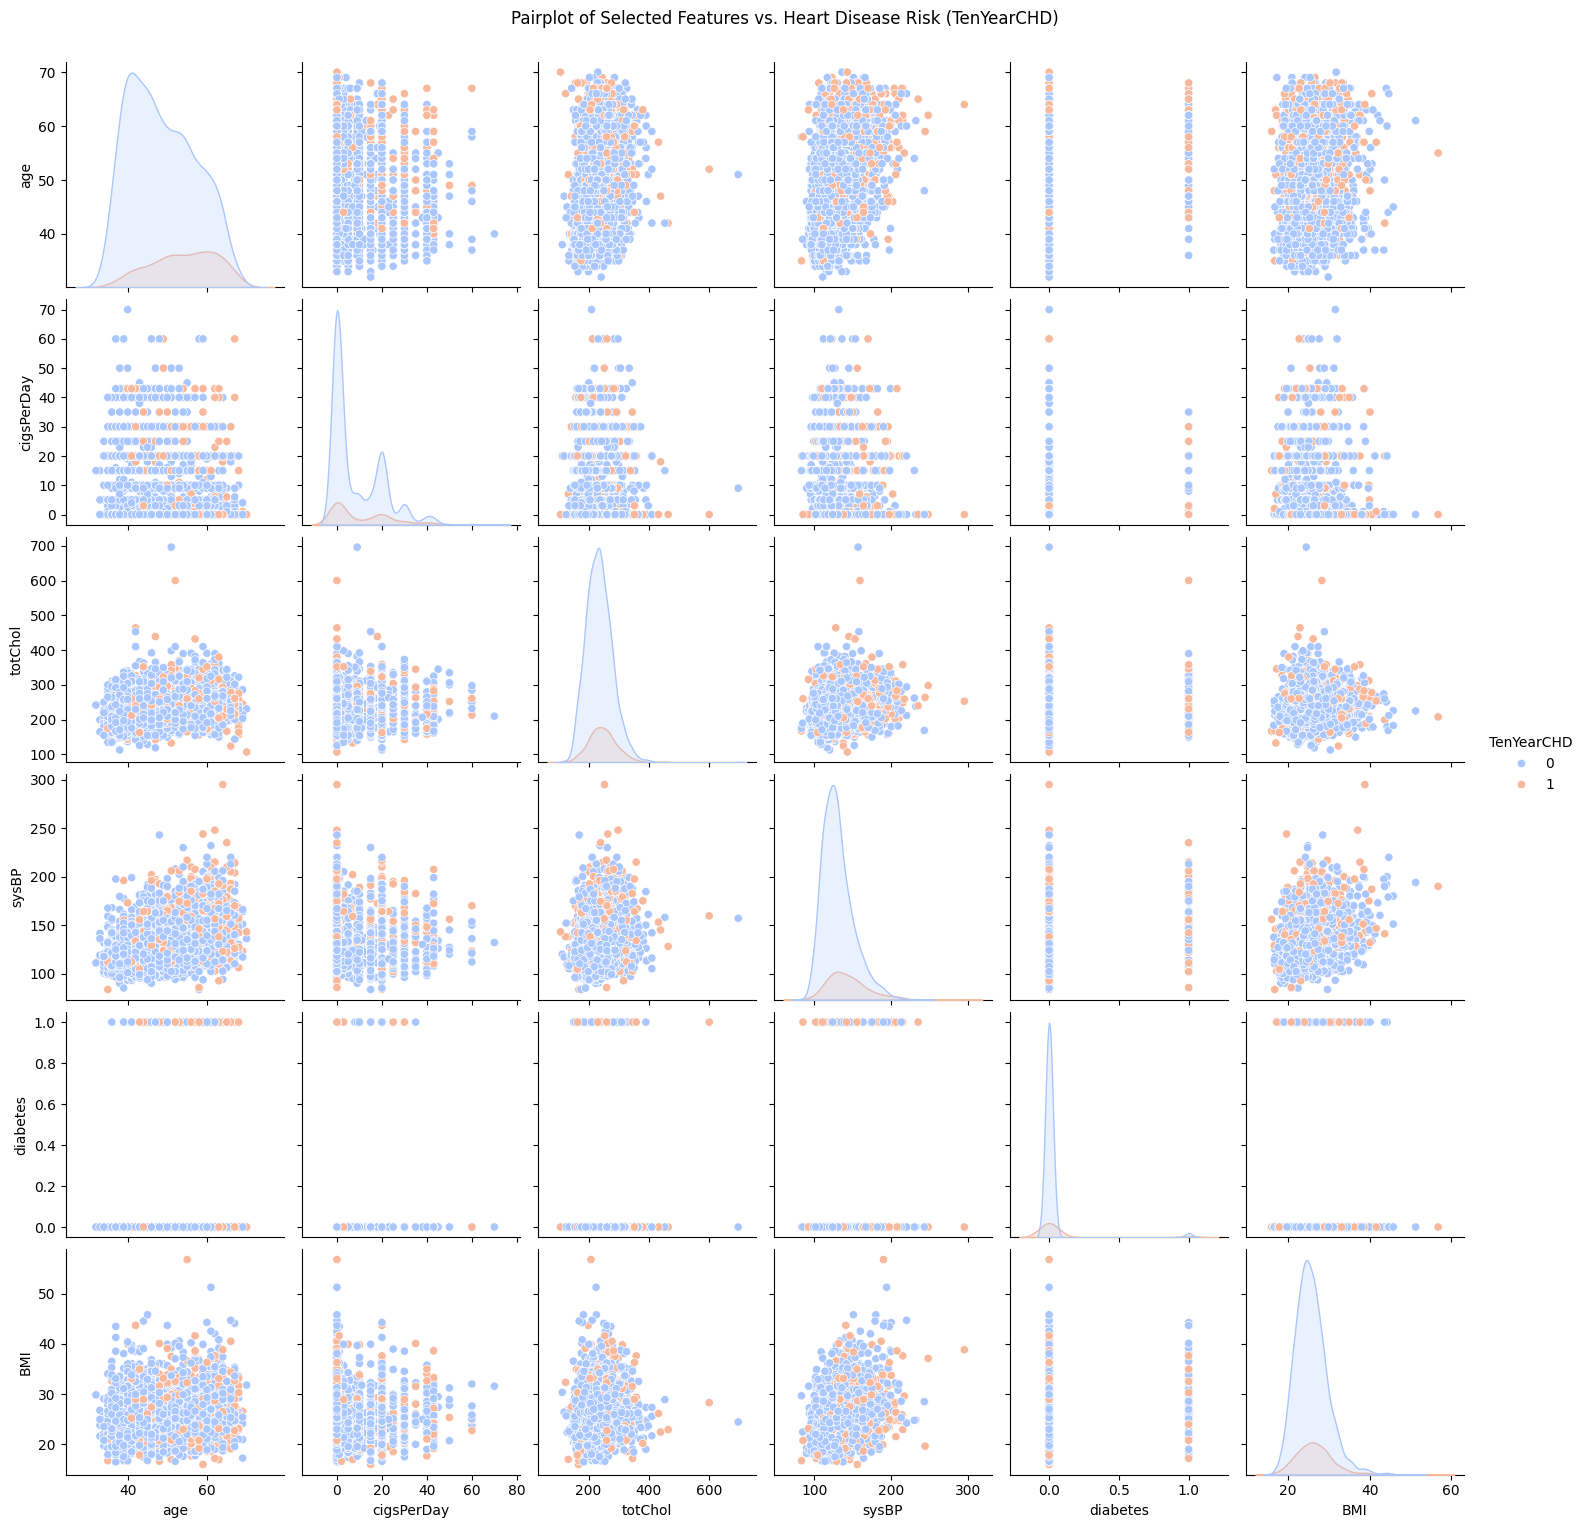

In [17]:
# Plotting the pairplot for selected features
sns.pairplot(df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diabetes', 'BMI', 'TenYearCHD']], hue='TenYearCHD', palette='coolwarm')

# Adding a title
plt.suptitle('Pairplot of Selected Features vs. Heart Disease Risk (TenYearCHD)', y=1.02)

# Displaying the plot
plt.show()

### **Key Insights:**

The **insights** from the pairplot are:

1. **Age**: Older individuals tend to have a higher likelihood of being at risk for heart disease (`TenYearCHD`), as shown by the color distribution.

2. **CigsPerDay**: Smokers, especially those who smoke more, appear to have a higher risk of heart disease, with a noticeable clustering of smokers in the high-risk category.

3. **TotChol and SysBP**: Higher cholesterol levels and systolic blood pressure correlate with a higher risk of heart disease, with these features showing a trend of higher values in individuals with `TenYearCHD`.

4. **BMI**: Higher BMI values are more common in individuals at risk for heart disease, indicating obesity as a potential risk factor.

5. **Diabetes**: Those with diabetes have a clear association with higher heart disease risk.

Overall, the pairplot shows that features like age, smoking, cholesterol, blood pressure, BMI, and diabetes all have a visible relationship with the likelihood of heart disease.

### **Conclusion:**
#### The conclusion from the pairplot analysis is that **age, smoking habits, cholesterol levels, blood pressure, BMI, and diabetes** are all significant factors associated with an increased risk of heart disease (`TenYearCHD`). These features show distinct patterns, with higher values in individuals at risk for heart disease, indicating their potential as important predictors for cardiovascular health. Addressing these factors could help reduce the risk of heart disease.

____

### **Correlation Analysis:**

### **Objective:**
#### The objective of this analysis is to explore and visualize the relationships between key health indicators (such as age, smoking, cholesterol, BMI, and heart rate) and the likelihood of heart disease (TenYearCHD). By examining the correlation matrix, we aim to identify strong relationships and factors that may influence heart disease risk, which can be helpful for further analysis and predictive modeling.

In [18]:
numerical_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.192335,0.274028,0.404845,0.221896,0.138176,-0.002596,0.116135,0.224927
cigsPerDay,-0.192335,1.000000,-0.024703,-0.100834,-0.068785,-0.100996,0.066759,-0.068797,0.066778
totChol,0.274028,-0.024703,1.000000,0.199159,0.154974,0.114305,0.087458,0.062723,0.094306
sysBP,0.404845,-0.100834,0.199159,1.000000,0.781908,0.333864,0.178262,0.143090,0.212703
diaBP,0.221896,-0.068785,0.154974,0.781908,1.000000,0.380498,0.174904,0.071499,0.135979
BMI,0.138176,-0.100996,0.114305,0.333864,0.380498,1.000000,0.069655,0.093454,0.066947
heartRate,-0.002596,0.066759,0.087458,0.178262,0.174904,0.069655,1.000000,0.088334,0.020241
glucose,0.116135,-0.068797,0.062723,0.143090,0.071499,0.093454,0.088334,1.000000,0.138200
TenYearCHD,0.224927,0.066778,0.094306,0.212703,0.135979,0.066947,0.020241,0.138200,1.000000


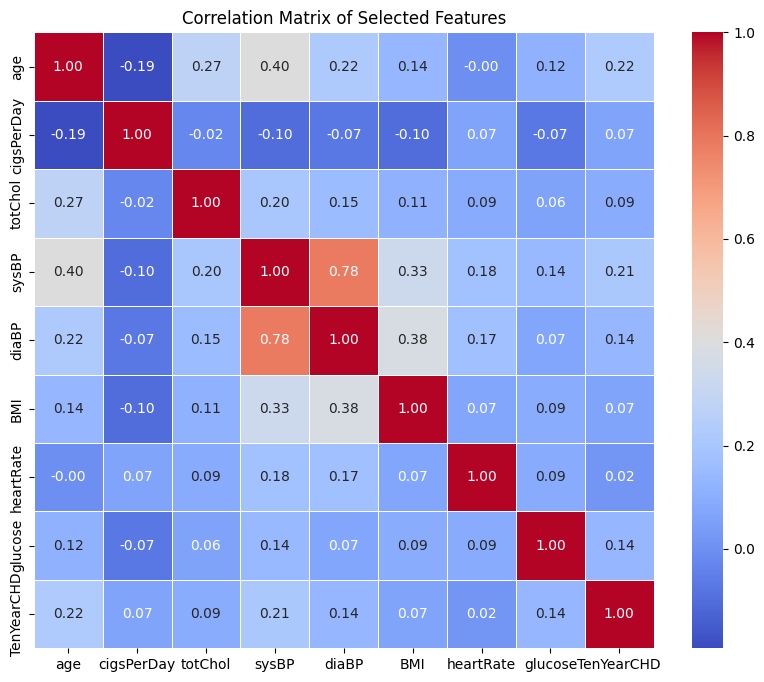

In [19]:
numerical_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

### **Key Insights:**

1. **Age** is moderately positively correlated with **cholesterol** (totChol), **systolic blood pressure** (sysBP), and **diastolic blood pressure** (diaBP), but negatively correlated with **cigarettes per day** (cigsPerDay).

2. **Smoking** (cigsPerDay) has weak correlations with other variables, including **heart disease risk** (TenYearCHD).

3. **Cholesterol** (totChol) has a slight positive correlation with **blood pressure**, but weak correlation with **heart disease risk**.

4. **Blood pressure** (sysBP and diaBP) is strongly correlated with each other and weakly correlated with **heart disease risk**.

5. **BMI** has weak positive correlations with **blood pressure** and very weak correlation with **heart disease risk**.

6. **Heart rate** has very weak correlations with all other variables.

7. **Glucose** shows a slight positive correlation with **heart disease risk**.

In summary, age and blood pressure are more strongly related to heart disease risk than other factors like smoking, BMI, or cholesterol.

### **Conclusion:**

1. **Age and Blood Pressure** are stronger indicators of heart disease risk, with age correlating with higher cholesterol and blood pressure.

2. **Smoking** has a weak correlation with heart disease risk in this dataset.

3. **BMI and Cholesterol** show weak associations with heart disease risk, mainly influencing blood pressure.

4. **Glucose** has a slight positive correlation with heart disease risk.



### Overall Conclusion:
- **Age, blood pressure, and glucose** are more strongly associated with heart disease risk, while **smoking, BMI, and cholesterol** have weaker effects.

____

### **Key Findings and Conclusions from Categorical Data Analysis:**

### **Objective:**

####The objective is to **analyze the distribution** of categorical variables such as **education**, **sex**, **smoking status**, **prevalent stroke**, **prevalent hypertension**, **diabetes**, and **heart disease risk** (TenYearCHD) in the dataset. This analysis aims to:

- 1. Visualize the frequency of each category (e.g., number of smokers vs. non-smokers).

- 2. Identify patterns and imbalances in the data (e.g., gender or smoking distribution).

- 3. Understand the relationship between demographic factors and health outcomes.
  

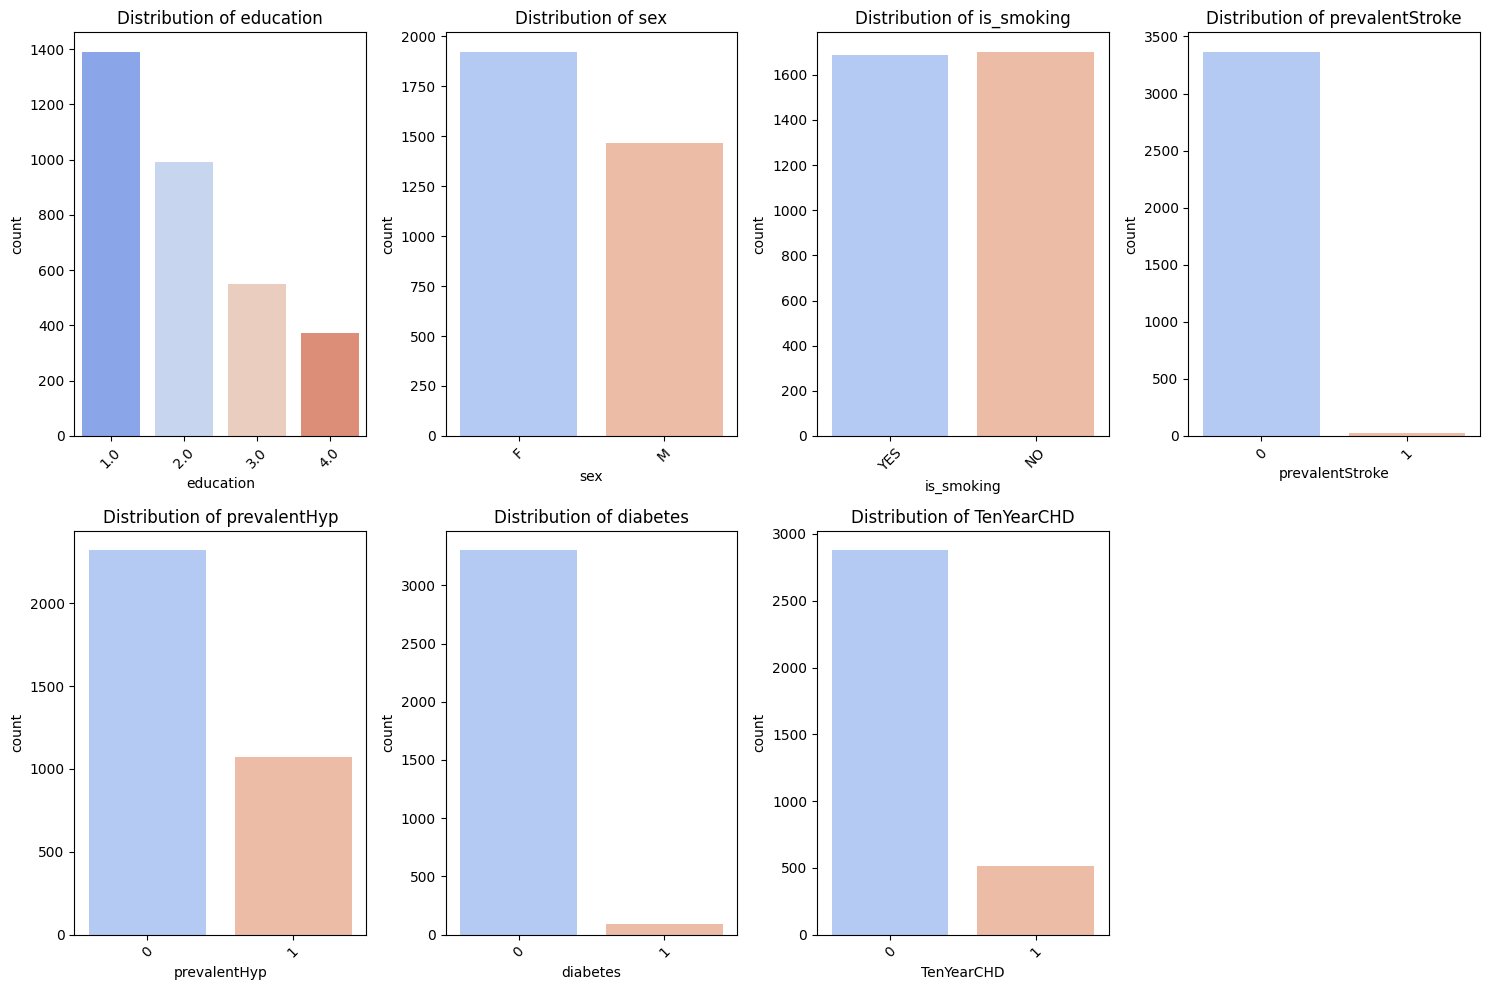

In [20]:
# List of categorical variables to analyze
categorical_vars = ['education', 'sex', 'is_smoking', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

# Set up the figure
plt.figure(figsize=(15, 10))

# Plot bar charts for each categorical variable
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns for the subplots
    sns.countplot(data=df, x=var, palette='coolwarm')
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### **Key Insights:**

1. **Gender Distribution**: Shows balance or imbalance between male and female participants.

2. **Smoking Status**: Highlights the prevalence of smoking and its potential impact on heart disease.

3. **Prevalence of Stroke and Hypertension**: Reveals the commonality of these conditions in the dataset, which are key heart disease risk factors.

4. **Diabetes**: Indicates the number of individuals with diabetes, a significant heart disease risk factor.

5. **Heart Disease Risk**: Shows the proportion of individuals at risk for heart disease and how other factors like smoking or hypertension might influence this.

6. **Education**: Provides insight into the socio-economic background of the population, potentially affecting health outcomes.


### **Conclusion:**

1. **Smoking, diabetes, and hypertension** are key factors influencing heart disease risk.

2. **Gender imbalance** (if any) should be addressed to avoid biased results.

3. **Prevalence of stroke and hypertension** suggests their importance in predicting heart disease.

4. **Education levels** might provide insights into socio-economic factors affecting health outcomes.

5. **Heart disease risk** is influenced by factors like smoking, hypertension, and diabetes.



_____

### **Risk Factor Comparison: Smoking and Education Level vs. Heart Disease Risk**

### **Objective:**
#### The objective is to analyze how **smoking status** and **education level** impact the risk of **heart disease** (TenYearCHD) by comparing their distribution across individuals with and without heart disease. This helps identify potential risk factors related to lifestyle and socio-economic status.

In [21]:
# Compute count for 'TenYearCHD' by 'is_smoking' and 'education' variables
smoking_counts = df.groupby(['is_smoking', 'TenYearCHD']).size().unstack(fill_value=0)
education_counts = df.groupby(['education', 'TenYearCHD']).size().unstack(fill_value=0)

# Print the counts as numeric output
print("Smoking Status vs. Heart Disease Risk:")
print(smoking_counts)
print("\nEducation Level vs. Heart Disease Risk:")
print(education_counts)

Smoking Status vs. Heart Disease Risk:
TenYearCHD     0    1
is_smoking           
NO          1467  236
YES         1412  275

Education Level vs. Heart Disease Risk:
TenYearCHD     0    1
education            
1.0         1135  256
2.0          872  118
3.0          479   70
4.0          319   54


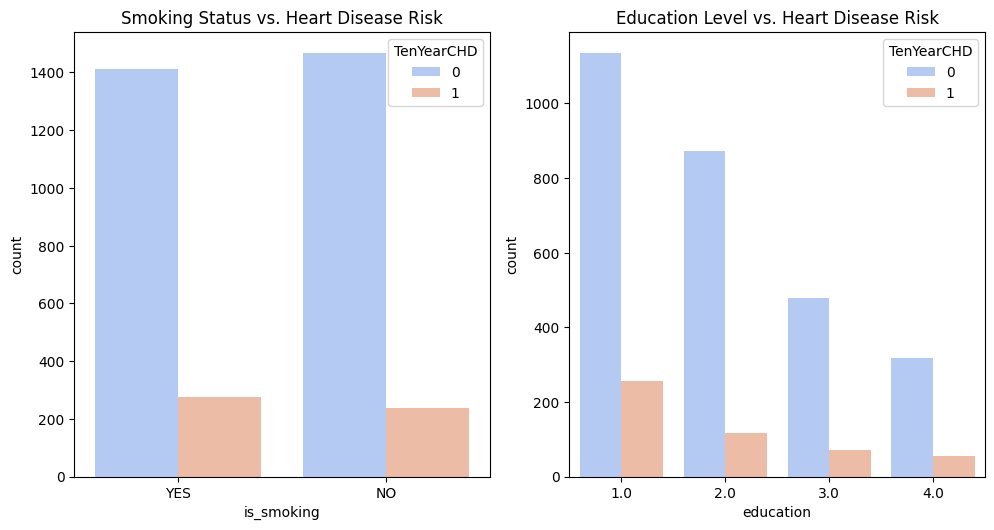

In [22]:
# Set the figure size for plots
plt.figure(figsize=(15, 10))

# Smoking status distribution by heart disease risk
plt.subplot(2, 3, 4)
sns.countplot(x='is_smoking', hue='TenYearCHD', data=df, palette='coolwarm')
plt.title('Smoking Status vs. Heart Disease Risk')

# Education level distribution by heart disease risk
plt.subplot(2, 3, 5)
sns.countplot(x='education', hue='TenYearCHD', data=df, palette='coolwarm')
plt.title('Education Level vs. Heart Disease Risk')

plt.tight_layout()
plt.show()


### **Key Insights:**

#### 1. **Smoking Status vs. Heart Disease Risk**:
   - Smokers (**is_smoking = YES**) have a higher total count of heart disease cases (**TenYearCHD = 1**) compared to non-smokers (**is_smoking = NO**).
   - Non-smokers have 1467 individuals with no heart disease, whereas smokers have 1412.
   - Smokers are more likely to develop heart disease, as seen from the higher count of 275 smokers with heart disease compared to 236 non-smokers.

#### 2. **Education Level vs. Heart Disease Risk**:
   - Higher education levels seem to correlate with a lower incidence of heart disease.
   - People with **education level 1** have the highest number of heart disease cases (256 with heart disease vs. 1135 without).
   - People with **education levels 3 and 4** have fewer heart disease cases, indicating that lower education levels might be associated with a higher risk of heart disease.



- These insights suggest that **smoking** is a significant risk factor for heart disease, and **education level** might play a role in the likelihood of developing heart disease.

### **Conclusion:**


1. **Smoking**: Smokers have a higher incidence of heart disease compared to non-smokers, indicating that smoking is a strong risk factor for heart disease.
  
2. **Education Level**: Individuals with lower education levels tend to have a higher risk of heart disease, suggesting that education may influence health behaviors and access to healthcare, affecting heart disease risk.

____

### **Impact of Smoking on Hypertension, Stroke, and Heart Disease Risk:**

### **Objective:**
- Analyze the impact of smoking and cigarette consumption on hypertension, stroke, and heart disease risk (TenYearCHD).

- Compare cigarette consumption between individuals with and without these health conditions.

- Examine smoking status across these groups to identify potential links between smoking and health risks.

In [23]:
# 1. Compute the statistics for cigsPerDay for each health condition
# Prevalent Hypertension
hypertension_stats = df.groupby('prevalentHyp')['cigsPerDay'].describe()

# Prevalent Stroke
stroke_stats = df.groupby('prevalentStroke')['cigsPerDay'].describe()

# TenYearCHD (Heart Disease Risk)
heart_disease_stats = df.groupby('TenYearCHD')['cigsPerDay'].describe()

# 2. Compute the counts for smoking status across each health condition
smoking_vs_hypertension = pd.crosstab(df['is_smoking'], df['prevalentHyp'])
smoking_vs_stroke = pd.crosstab(df['is_smoking'], df['prevalentStroke'])
smoking_vs_heart_disease = pd.crosstab(df['is_smoking'], df['TenYearCHD'])

print("Prevalent Hypertension Statistics for Cigarettes Per Day:")
print(hypertension_stats)

print("\nPrevalent Stroke Statistics for Cigarettes Per Day:")
print(stroke_stats)

print("\nHeart Disease Risk (TenYearCHD) Statistics for Cigarettes Per Day:")
print(heart_disease_stats)

print("\nSmoking vs Hypertension Distribution:")
print(smoking_vs_hypertension)

print("\nSmoking vs Stroke Distribution:")
print(smoking_vs_stroke)

print("\nSmoking vs Heart Disease Risk Distribution:")
print(smoking_vs_heart_disease)


Prevalent Hypertension Statistics for Cigarettes Per Day:
               count      mean        std  min  25%  50%   75%   max
prevalentHyp                                                        
0             2304.0  9.709635  11.808406  0.0  0.0  3.0  20.0  60.0
1             1064.0  7.683271  11.918912  0.0  0.0  0.0  15.0  70.0

Prevalent Stroke Statistics for Cigarettes Per Day:
                  count      mean        std  min  25%  50%   75%   max
prevalentStroke                                                        
0                3346.0  9.109982  11.897865  0.0  0.0  0.0  20.0  70.0
1                  22.0  2.909091   6.054586  0.0  0.0  0.0   0.0  20.0

Heart Disease Risk (TenYearCHD) Statistics for Cigarettes Per Day:
             count       mean        std  min  25%  50%   75%   max
TenYearCHD                                                         
0           2858.0   8.734430  11.622571  0.0  0.0  0.0  20.0  70.0
1            510.0  10.947059  13.079143  0.0  0.0  4

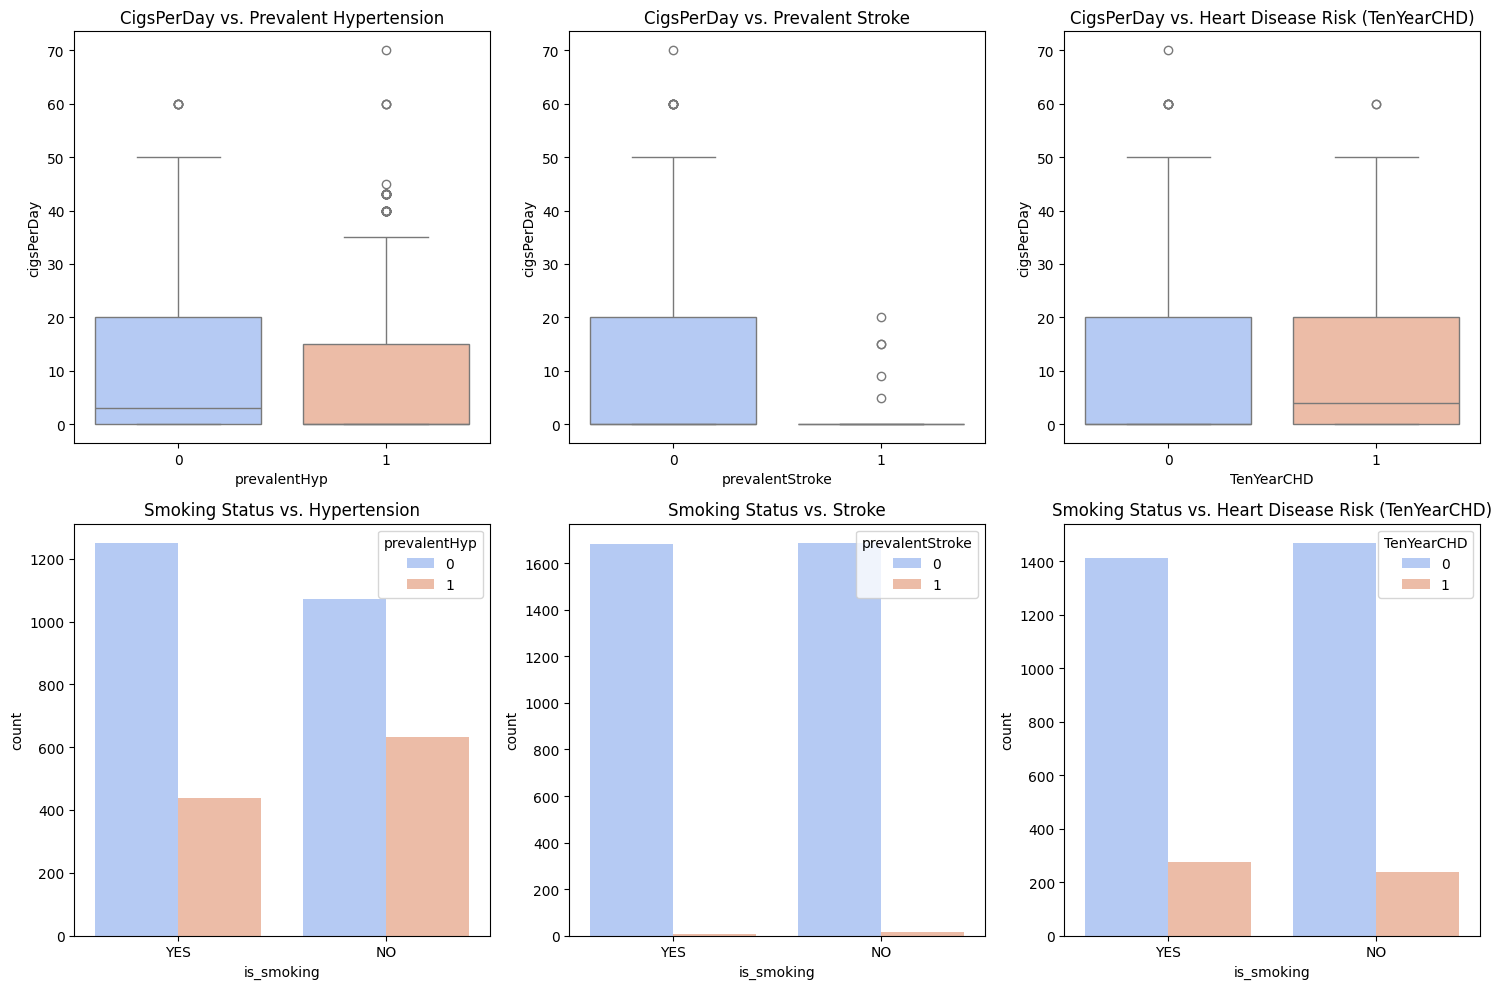

In [24]:
# Set the figure size for plots
plt.figure(figsize=(15, 10))

# Boxplot for cigsPerDay for those with and without prevalentHyp (Hypertension)
plt.subplot(2, 3, 1)
sns.boxplot(x='prevalentHyp', y='cigsPerDay', data=df, palette='coolwarm')
plt.title('CigsPerDay vs. Prevalent Hypertension')

# Boxplot for cigsPerDay for those with and without prevalentStroke (Stroke)
plt.subplot(2, 3, 2)
sns.boxplot(x='prevalentStroke', y='cigsPerDay', data=df, palette='coolwarm')
plt.title('CigsPerDay vs. Prevalent Stroke')

# Boxplot for cigsPerDay for those with and without TenYearCHD (Heart Disease)
plt.subplot(2, 3, 3)
sns.boxplot(x='TenYearCHD', y='cigsPerDay', data=df, palette='coolwarm')
plt.title('CigsPerDay vs. Heart Disease Risk (TenYearCHD)')

# Bar chart for Smoking status distribution across prevalentHyp (Hypertension)
plt.subplot(2, 3, 4)
sns.countplot(x='is_smoking', hue='prevalentHyp', data=df, palette='coolwarm')
plt.title('Smoking Status vs. Hypertension')

# Bar chart for Smoking status distribution across prevalentStroke (Stroke)
plt.subplot(2, 3, 5)
sns.countplot(x='is_smoking', hue='prevalentStroke', data=df, palette='coolwarm')
plt.title('Smoking Status vs. Stroke')

# Bar chart for Smoking status distribution across TenYearCHD (Heart Disease)
plt.subplot(2, 3, 6)
sns.countplot(x='is_smoking', hue='TenYearCHD', data=df, palette='coolwarm')
plt.title('Smoking Status vs. Heart Disease Risk (TenYearCHD)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### **Key Insights:**

1. **Hypertension:** Smokers without hypertension tend to smoke slightly more (mean = 9.71) than those with hypertension (mean = 7.68).

2. **Stroke:** Smokers have significantly fewer stroke cases (mean = 2.91) compared to non-smokers (mean = 9.11), suggesting weak or no correlation between smoking and stroke.

3. **Heart Disease Risk:** Smokers at higher risk for heart disease smoke more (mean = 10.95) than those at lower risk (mean = 8.73).

4. **Smoking and Hypertension:** A higher proportion of smokers have hypertension.

5. **Smoking and Stroke:** Very few smokers have a history of stroke.

6. **Smoking and Heart Disease:** Smokers are more likely to be at risk for heart disease, but the association is not strong.



- Smoking is linked to higher heart disease risk and hypertension, but its relationship with stroke is weak.

### **Conclusion:**

1. **Smoking and Hypertension:** Smokers are more likely to have hypertension, as they tend to smoke more compared to those without hypertension.

2. **Smoking and Stroke:** There is a weak relationship between smoking and stroke, as very few smokers have had a stroke.

3. **Smoking and Heart Disease Risk:** Smokers are at a higher risk for heart disease, as they tend to smoke more cigarettes than those without heart disease risk.

- Overall, smoking is significantly associated with hypertension and heart disease risk but has a minimal connection with stroke.

____

### **Analysis of the relationship between blood pressure and cholesterol levels in hypertensive and non-hypertensive individuals:**

### **Objective:**
The objective of the code is to explore the relationship between **systolic blood pressure (sysBP)**, **total cholesterol (totChol)**, and **diastolic blood pressure (diaBP)**, particularly focusing on individuals with and without **prevalent hypertension**.

The analysis includes:

1. **Pearson correlation** to examine the linear relationship between systolic blood pressure and cholesterol.

2. **Descriptive statistics** for systolic and total cholesterol values, comparing them between people with and without hypertension.

3. **Data visualizations** (scatter plot and violin plot) to visually explore patterns and differences in blood pressure based on cholesterol levels and hypertension status.

- Overall, the code aims to provide insights into how blood pressure and cholesterol are related, especially in the context of hypertension.

In [25]:
# 1. Pearson correlation between systolic BP and total cholesterol (skip NaN and inf values)
# Remove NaN or infinite values only for correlation calculation
sysBP_clean = df['sysBP'].replace([float('inf'), float('-inf')], np.nan).dropna()
totChol_clean = df['totChol'].replace([float('inf'), float('-inf')], np.nan).dropna()

# Align the data (only matching indices between sysBP and totChol)
common_indices = sysBP_clean.index.intersection(totChol_clean.index)
sysBP_clean = sysBP_clean.loc[common_indices]
totChol_clean = totChol_clean.loc[common_indices]

# Calculate the Pearson correlation, ignoring NaN and infinite values
corr, p_value = pearsonr(sysBP_clean, totChol_clean)
print(f"Pearson correlation between systolic BP and total cholesterol: {corr:.3f} (p-value: {p_value:.3e})")

# Descriptive statistics for sysBP and totChol, ignoring NaN or infinite values
sysBP_stats = df['sysBP'].replace([float('inf'), float('-inf')], np.nan).describe()
totChol_stats = df['totChol'].replace([float('inf'), float('-inf')], np.nan).describe()
print("\nDescriptive statistics for Systolic Blood Pressure (sysBP):")
print(sysBP_stats)
print("\nDescriptive statistics for Total Cholesterol (totChol):")
print(totChol_stats)

# 2. Descriptive statistics for systolic and diastolic BP based on prevalentHyp
# Skip NaN and infinite values for systolic and diastolic BP based on prevalentHyp
sysBP_prevalentHypertension = df[df['prevalentHyp'] == 1]['sysBP'].replace([float('inf'), float('-inf')], np.nan).describe()
diaBP_prevalentHypertension = df[df['prevalentHyp'] == 1]['diaBP'].replace([float('inf'), float('-inf')], np.nan).describe()

sysBP_noHypertension = df[df['prevalentHyp'] == 0]['sysBP'].replace([float('inf'), float('-inf')], np.nan).describe()
diaBP_noHypertension = df[df['prevalentHyp'] == 0]['diaBP'].replace([float('inf'), float('-inf')], np.nan).describe()

print("\nDescriptive statistics for Systolic BP for People with Hypertension:")
print(sysBP_prevalentHypertension)

print("\nDescriptive statistics for Diastolic BP for People with Hypertension:")
print(diaBP_prevalentHypertension)

print("\nDescriptive statistics for Systolic BP for People without Hypertension:")
print(sysBP_noHypertension)

print("\nDescriptive statistics for Diastolic BP for People without Hypertension:")
print(diaBP_noHypertension)

# To compute the difference between systolic and diastolic BP for each group, ignoring NaN and inf values
sysBP_diff_hypertension = sysBP_prevalentHypertension['mean'] - diaBP_prevalentHypertension['mean']
sysBP_diff_no_hypertension = sysBP_noHypertension['mean'] - diaBP_noHypertension['mean']

print(f"\nDifference between systolic and diastolic BP for people with hypertension: {sysBP_diff_hypertension:.2f}")
print(f"Difference between systolic and diastolic BP for people without hypertension: {sysBP_diff_no_hypertension:.2f}")

Pearson correlation between systolic BP and total cholesterol: 0.199 (p-value: 2.487e-31)

Descriptive statistics for Systolic Blood Pressure (sysBP):
count    3390.00000
mean      132.60118
std        22.29203
min        83.50000
25%       117.00000
50%       128.50000
75%       144.00000
max       295.00000
Name: sysBP, dtype: float64

Descriptive statistics for Total Cholesterol (totChol):
count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

Descriptive statistics for Systolic BP for People with Hypertension:
count    1069.000000
mean      155.567353
std        21.121885
min       109.000000
25%       141.500000
50%       152.000000
75%       166.000000
max       295.000000
Name: sysBP, dtype: float64

Descriptive statistics for Diastolic BP for People with Hypertension:
count    1069.000000
mean       93.739944
std        11.554390
min   

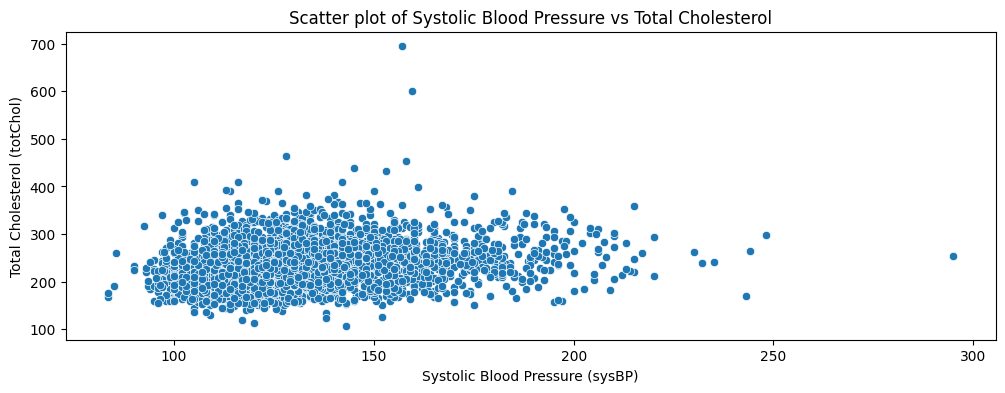

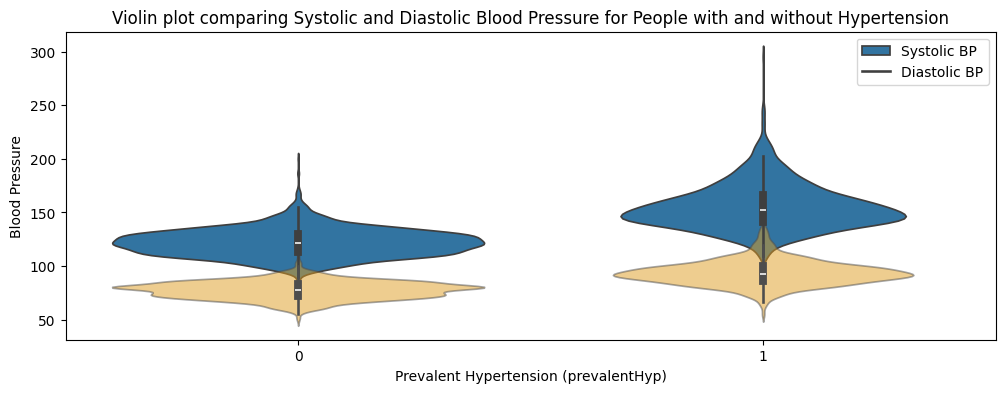

In [26]:
# 1. Scatter plot of systolic blood pressure (sysBP) vs. total cholesterol (totChol)
plt.figure(figsize=(12, 4))
sns.scatterplot(x='sysBP', y='totChol', data=df)
plt.title('Scatter plot of Systolic Blood Pressure vs Total Cholesterol')
plt.xlabel('Systolic Blood Pressure (sysBP)')
plt.ylabel('Total Cholesterol (totChol)')
plt.show()

# 2. Violin plot comparing sysBP and diaBP for people with and without prevalent hypertension (prevalentHyp)
plt.figure(figsize=(12, 4))
sns.violinplot(x='prevalentHyp', y='sysBP', data=df)
sns.violinplot(x='prevalentHyp', y='diaBP', data=df, color='orange', alpha=0.5)
plt.title('Violin plot comparing Systolic and Diastolic Blood Pressure for People with and without Hypertension')
plt.xlabel('Prevalent Hypertension (prevalentHyp)')
plt.ylabel('Blood Pressure')
plt.legend(['Systolic BP', 'Diastolic BP'])
plt.show()


### **Key Insights:**

- **Hypertensive individuals** have significantly higher systolic (155.57 mmHg) and diastolic (93.74 mmHg) blood pressure compared to non-hypertensive individuals (systolic: 122.02 mmHg, diastolic: 77.88 mmHg).
- The **difference between systolic and diastolic BP** is larger in hypertensive individuals (61.83 mmHg) compared to non-hypertensive individuals (44.14 mmHg), suggesting higher pulse pressure in hypertensive patients.
- **Cholesterol levels** have a wide range, with a mean of 237.07 mg/dL, indicating variation in cholesterol across the dataset.

### **Conclusion:**

1. **Hypertensive individuals** have significantly higher blood pressure compared to non-hypertensive individuals.
2. **Pulse pressure** (the difference between systolic and diastolic BP) is higher in hypertensive individuals, indicating potential cardiovascular risk.
3. **Cholesterol levels** vary widely, with a mean of 237.07 mg/dL, highlighting potential risk factors for heart disease.

____

### **Comparison of Heart Rate Distribution Between Smokers and Non-Smokers:**

### **Objective:**
#### The objective is to compare heart rate distributions between smokers and non-smokers to identify differences in central tendency, spread, and outliers, and to explore how smoking may affect heart rate.

- Smoking Status Comparison: This analysis aims to compare heart rate distributions between smokers and non-smokers.

- Heart Rate Variability: By using the boxplot, the objective is to observe the spread (interquartile range), the median heart rate, and any potential outliers within each group.

- Understanding Health Implications: It also provides an opportunity to understand how smoking could be associated with different heart rate patterns, which might be related to cardiovascular health.

In [27]:
# Compute summary statistics for heart rate based on smoking status (is_smoking)
smoking_stats = df.groupby('is_smoking')['heartRate'].describe()

# Display statistics for smokers (is_smoking = 1) and non-smokers (is_smoking = 0)
print("Summary Statistics for Heart Rate by Smoking Status:")
print(smoking_stats)

Summary Statistics for Heart Rate by Smoking Status:
             count       mean        std   min   25%   50%   75%    max
is_smoking                                                             
NO          1703.0  75.236641  12.191134  45.0  67.0  75.0  82.0  143.0
YES         1686.0  76.725386  11.702338  48.0  69.0  75.0  85.0  122.0


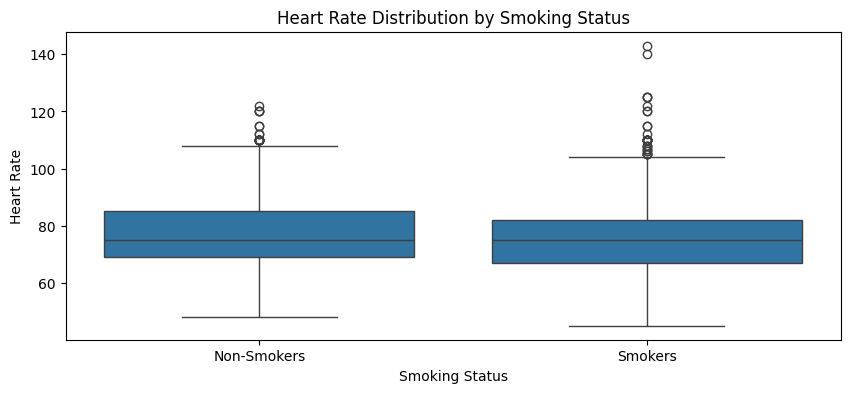

In [28]:
# Boxplot comparing heart rate between smokers (is_smoking = 1) and non-smokers (is_smoking = 0)
plt.figure(figsize=(10, 4))
sns.boxplot(x='is_smoking', y='heartRate', data=df)
plt.title('Heart Rate Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Heart Rate')
plt.xticks([0, 1], ['Non-Smokers', 'Smokers'])  # Adjust x-axis labels
plt.show()

### **Key Insights:**

1. **Heart Rate Mean**:
   - Smokers (`YES`) have a slightly **higher mean heart rate** (76.73 bpm) compared to non-smokers (`NO`, 75.24 bpm), suggesting that smoking may be associated with a marginally higher heart rate.

2. **Spread of Heart Rates**:
   - The **standard deviation** is slightly higher for non-smokers (12.19) compared to smokers (11.70), indicating that non-smokers' heart rates may vary a bit more widely, but the difference is small.

3. **Range of Heart Rates**:
   - Non-smokers have a **wider range** of heart rates, with a **max** value of 143 bpm, compared to smokers' maximum of 122 bpm. This could suggest that non-smokers have more extreme values, but the general trend is that smokers have a more clustered range.

4. **Percentiles**:
   - The **25th, 50th, and 75th percentiles** (IQR) are fairly similar for both groups, with smokers showing a slightly higher heart rate at all these points (e.g., smokers’ 75th percentile is 85 bpm, while non-smokers' 75th percentile is 82 bpm).



### **Conclusion**:
- **Smoking** is associated with a slightly higher average heart rate, but the overall distribution of heart rates is similar between smokers and non-smokers.

- The range of heart rates is broader in non-smokers, while smokers tend to have a more clustered distribution of heart rates.

- Smokers have a slightly higher average heart rate than non-smokers, with a more clustered distribution, while non-smokers show a wider range of heart rates.

____

## **4. Feature Engineering & Data Pre-processing**

In [29]:
df.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


____

## **1. Handling Missing Data Column:**

## Handling Missing Data in the "education" Column:

In [30]:
df['education'].isnull().sum()

np.int64(87)

In [31]:
df['education'].value_counts()

,count
education,
1.0,1391
2.0,990
3.0,549
4.0,373


In [32]:
education_mode = df['education'].mode()[0]
education_mode

np.float64(1.0)

____

#### The "education" column contains 87 missing (null) values. To address this issue, we have decided to replace the missing values with the mode (the most frequent value) of the column. This approach was chosen as it ensures that the most common educational level is used to fill in the missing entries, which is a reasonable strategy when the missing data is assumed to follow a similar distribution as the existing values.

In [33]:
df['education'] = df['education'].fillna(education_mode)
df['education'].isnull().sum()

np.int64(0)

____

## Handling Missing Data in the "cigsPerDay" Column:

In [34]:
df['cigsPerDay'].head()

,cigsPerDay
0,3.0
1,0.0
2,10.0
3,20.0
4,30.0


In [35]:
df['cigsPerDay'].isnull().sum()

np.int64(22)

In [36]:
df['cigsPerDay'].mean()

np.float64(9.069477434679335)

In [37]:
cigsPerDay_mean = df['cigsPerDay'].mean()
df['cigsPerDay'] = df['cigsPerDay'].fillna(cigsPerDay_mean)
df['cigsPerDay'].isnull().sum()

np.int64(0)

#### The "**cigsPerDay**" column contains 22 missing (null) values. As this is a numerical column, we have chosen to replace the missing values with the mean of the column. This approach is commonly used for numerical data, as it helps preserve the overall distribution of the data while minimizing bias that could result from removing rows with missing values. By using the mean, we ensure that the data remains consistent and does not introduce large shifts in its statistical properties.

____

## Handling Missing Data in the "BPMeds" Column:

In [38]:
df['BPMeds'].isnull().sum()

np.int64(44)

In [39]:
df['BPMeds'].value_counts()

,count
BPMeds,
0.0,3246
1.0,100


In [40]:
BPMeds_mode = df['BPMeds'].mode()[0]
BPMeds_mode

np.float64(0.0)

In [41]:
df['BPMeds'] = df['BPMeds'].fillna(BPMeds_mode)
df['BPMeds'].isnull().sum()

np.int64(0)

#### The "**BPMeds**" column contains 40 missing (null) values. Since this is a categorical column, we have chosen to replace the missing values with the mode (the most frequent category) of the column. This approach ensures that the missing values are filled with the most common category, preserving the overall distribution of the data. Using the mode to replace missing categorical values is a standard practice, as it minimizes the impact on the data while maintaining consistency in the dataset.

____

## Handling Missing Data in the "totChol" Column:

In [42]:
df['totChol'].isnull().sum()

np.int64(38)

In [43]:
df['totChol'].value_counts()

,count
totChol,
240.0,65
210.0,51
220.0,48
260.0,46
232.0,45
...,...
355.0,1
337.0,1
126.0,1


In [44]:
totChol_mean = df['totChol'].mean()
print(f"totChol mean is {totChol_mean}")

totChol mean is 237.07428400954655


In [45]:
totChol_median = df['totChol'].median()
print(f"totChol median is {totChol_median}")

totChol median is 234.0


In [46]:
df['totChol'] = df['totChol'].fillna(totChol_mean)
df['totChol'].isnull().sum()

np.int64(0)

#### The "**totChol**" column contains 38 missing (null) values. As this is a numerical column, we have chosen to replace the missing values with the mean of the column. This method is commonly used for numerical data when missing values are present, as it preserves the overall statistical properties of the dataset. By replacing the missing values with the mean, we ensure that the imputation does not introduce significant bias and that the data remains consistent for further analysis.

____

## Handling Missing Data in the "BMI" Column:

In [47]:
df['BMI'].isnull().sum()

np.int64(14)

In [48]:
df['BMI'].value_counts()

,count
BMI,
22.91,17
22.54,16
22.19,15
25.09,12
23.48,12
...,...
36.29,1
34.25,1
38.61,1


In [49]:
BMI_mean = df['BMI'].mean()
print(f"BMI mean is {BMI_mean}")

BMI mean is 25.7949644549763


In [50]:
df['BMI'] = df['BMI'].fillna(BMI_mean)
df['BMI'].isnull().sum()

np.int64(0)

#### The "**BMI**" column contains 14 missing (null) values. Since this is a numerical column, we have opted to replace the missing values with the mean of the column.

____

## Handling Missing Data in the "heartRate" Column:

In [51]:
df['heartRate'].isnull().sum()

np.int64(1)

In [52]:
df['heartRate'].value_counts()

,count
heartRate,
75.0,442
80.0,298
70.0,241
85.0,191
72.0,184
...,...
143.0,1
47.0,1
51.0,1


In [53]:
heartRate_mean = df['heartRate'].mean()
print(f"heartRate mean is {heartRate_mean}")

heartRate mean is 75.97727943346119


In [54]:
df['heartRate'] = df['heartRate'].fillna(heartRate_mean)
df['heartRate'].isnull().sum()

np.int64(0)

#### The "**heartRate**" column contains only 1 missing (null) value. Since this is a numerical column, we have opted to replace the missing values with the mean of the column.

____

## Handling Missing Data in the "glucose" Column:

In [55]:
df['glucose'].isnull().sum()

np.int64(304)

In [56]:
df['glucose'].value_counts()

,count
glucose,
75.0,149
83.0,135
70.0,123
77.0,122
80.0,118
...,...
125.0,1
167.0,1
183.0,1


In [57]:
glucose_mean = df['glucose'].median()
print(f"glucose median is {glucose_mean}")

glucose median is 78.0


In [58]:
df['glucose'] = df['glucose'].fillna(glucose_mean)
df['glucose'].isnull().sum()

np.int64(0)

#### The "**glucose**" column contains 304 missing (null) value. Since this is a numerical column, we have opted to replace the missing values with the mean of the column.

____

In [59]:
df.isnull().sum()

,0
id,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0


#### We have carefully examined the dataset for missing (null) values across all columns. After identifying the columns with missing data, appropriate strategies were applied for imputation to ensure data integrity and consistency.

- For **numerical columns** such as **"totChol"** and **"BMI"**, the missing values were replaced with the **mean** of the respective columns. This method is commonly used for numerical data, as it helps to preserve the overall statistical properties of the dataset and avoids introducing bias from removing rows with missing data.
  
- For **categorical columns** such as **"BPMeds"**, the missing values were replaced with the **mode** (most frequent category), ensuring that the imputation reflects the most common value in the dataset.

As a result of these imputation methods, the dataset is now free of missing values, allowing for further analysis and modeling without any data gaps.


____

## **2. Handling Inconsistent Data Values**

#### Handling the **education** column

In [60]:
df['education'].head()

,education
0,2.0
1,4.0
2,1.0
3,1.0
4,1.0


In [61]:
#Converting float values in 'education' column to integers
df['education'] = df['education'].astype(int)
df['education'].head()

,education
0,2
1,4
2,1
3,1
4,1


____

#### Handling the **cigsPerDay** column

In [62]:
df["cigsPerDay"].head()

,cigsPerDay
0,3.0
1,0.0
2,10.0
3,20.0
4,30.0


In [63]:
# Converting float values in 'cigsPerDay' column to integers
df['cigsPerDay'] = df['cigsPerDay'].astype(int)
df['cigsPerDay'].head()

,cigsPerDay
0,3
1,0
2,10
3,20
4,30


____

#### Handling the **BPMeds** column

In [64]:
df['BPMeds'].head()

,BPMeds
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [65]:
df["BPMeds"].unique()

array([0., 1.])

In [66]:
# Converting float values in 'BPMeds' column to integers
df['BPMeds'] = df['BPMeds'].astype(int)
df['BPMeds'].head()

,BPMeds
0,0
1,0
2,0
3,0
4,0


____

#### Handling the **totChol** column

In [67]:
df['totChol'].head()

,totChol
0,221.0
1,212.0
2,250.0
3,233.0
4,241.0


In [68]:
# Converting float values in 'totChol' column to integers
df['totChol'] = df['totChol'].astype(int)
df['totChol'].head()

,totChol
0,221
1,212
2,250
3,233
4,241


____

#### Handling the **sysBP** column

In [69]:
df['sysBP'].head()

,sysBP
0,148.0
1,168.0
2,116.0
3,158.0
4,136.5


In [70]:
# Converting float values in 'sysBP' column to integers
df['sysBP'] = df['sysBP'].astype(int)
df['sysBP'].head()

,sysBP
0,148
1,168
2,116
3,158
4,136


___

#### Handling the **diaBP** column

In [71]:
df['diaBP'].head()

,diaBP
0,85.0
1,98.0
2,71.0
3,88.0
4,85.0


In [72]:
# Converting float values in 'diaBP' column to integers
df['diaBP'] = df['diaBP'].astype(int)
df['diaBP'].head()

,diaBP
0,85
1,98
2,71
3,88
4,85


___

#### Handling the **BMI** column

In [73]:
df['BMI'].head()

,BMI
0,25.794964
1,29.770000
2,20.350000
3,28.260000
4,26.420000


In [74]:
# Converting float values in 'BMI' column to integers
df['BMI'] = df['BMI'].astype(int)
df['BMI'].head()

,BMI
0,25
1,29
2,20
3,28
4,26


___

#### Handling the **heartRate** column

In [75]:
df['heartRate'].head()

,heartRate
0,90.0
1,72.0
2,88.0
3,68.0
4,70.0


In [76]:
# Converting float values in 'heartRate' column to integers
df['heartRate'] = df['heartRate'].astype(int)
df['heartRate'].head()

,heartRate
0,90
1,72
2,88
3,68
4,70


____

#### Handling the **glucose** column

In [77]:
df["glucose"].head()

,glucose
0,80.0
1,75.0
2,94.0
3,94.0
4,77.0


In [78]:
# Converting float values in 'glucose' column to integers
df['glucose'] = df['glucose'].astype(int)
df['glucose'].head()

,glucose
0,80
1,75
2,94
3,94
4,77


### **We handled all Inconsistent Data Values**

____

In [79]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2,F,YES,3,0,0,0,0,221,148,85,25,90,80,1
1,1,36,4,M,NO,0,0,0,1,0,212,168,98,29,72,75,0
2,2,46,1,F,YES,10,0,0,0,0,250,116,71,20,88,94,0
3,3,50,1,M,YES,20,0,0,1,0,233,158,88,28,68,94,1
4,4,64,1,F,YES,30,0,0,0,0,241,136,85,26,70,77,0


____

### **3. Handling Outliers**

In [80]:
# let's create a function to check the outliers
columns = ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

import plotly.express as px
def check_outliers(columns,df):

  # use plotly for better plot
  for i in columns:
    fig = px.box(df,y=i)
    fig.update_layout(height=500, width=600)
    fig.show()

# Plot the graph
check_outliers(columns,df)

### **4. One Hot Encoding**

In [81]:
# Change sex code to 'F' and 'M' and use category as datatype
df['sex']=df['sex'].map({'M':0,'F':1})
df['sex'] = df['sex'].astype(int)

# Change is_smoking code to 'YES' and 'NO' and use category as datatype
df['is_smoking']=df['is_smoking'].map({'NO':0,'YES':1})
df['is_smoking'] = df['is_smoking'].astype(int)

____

In [82]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2,1,1,3,0,0,0,0,221,148,85,25,90,80,1
1,1,36,4,0,0,0,0,0,1,0,212,168,98,29,72,75,0
2,2,46,1,1,1,10,0,0,0,0,250,116,71,20,88,94,0
3,3,50,1,0,1,20,0,0,1,0,233,158,88,28,68,94,1
4,4,64,1,1,1,30,0,0,0,0,241,136,85,26,70,77,0


___

### **4. Feature Selection**

In [83]:
# Define predictor variables and target variable
x = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

____

### **5. Check Class Imbalance**

TenYearCHD
0    0.849263
1    0.150737
Name: proportion, dtype: float64


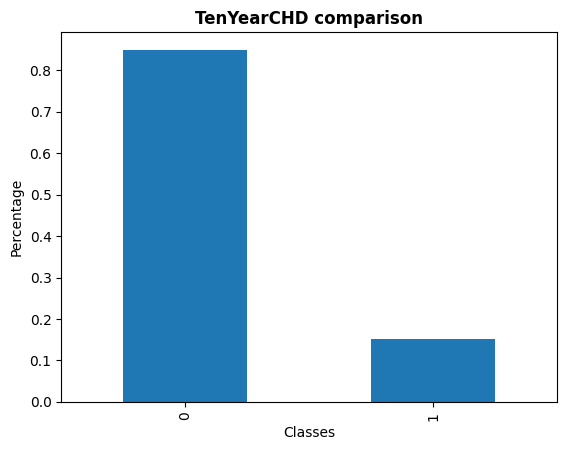

In [84]:
# Check target classes balance
cla_bal = df['TenYearCHD'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('TenYearCHD comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

* Dataset is imbalanced.

______

### **6. Split Training and Test Data**

In [85]:
# Define function to split data with and without SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.19,random_state=42)

In [86]:
# Shape of the train and test data
print('train dataset feature shape :- ',x_train.shape)
print('train dataset target shape :- ',y_train.shape)
print('test dataset feature shape :- ',x_test.shape)
print('test dataset target shape :- ',y_test.shape)

train dataset feature shape :-  (2745, 16)
train dataset target shape :-  (2745,)
test dataset feature shape :-  (645, 16)
test dataset target shape :-  (645,)


### **Feature Scaling**

In [87]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**SMOTE:-**

In [88]:
# Using SMOTE
from imblearn.over_sampling import SMOTE

print('Dataset Before:',y_train.value_counts())
smt = SMOTE()

# fit predictor and target variable
x_train_smt, y_train_smt = smt.fit_resample(x_train,y_train)

print('\nDataset After:',y_train_smt.value_counts())

Dataset Before: TenYearCHD
0    2327
1     418
Name: count, dtype: int64

Dataset After: TenYearCHD
0    2327
1    2327
Name: count, dtype: int64


_____

## **5. Classification Predictive Model Implimentation**

### **1. Logistic Regression (Model - 1)**

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the model
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)


# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000, 4000]
}

# Use StratifiedKFold for better validation
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform Grid Search with cross-validation
logistic_grid_model = GridSearchCV(
    logistic_regression, param_grid, scoring='roc_auc', cv=cv_strategy, n_jobs=-1, verbose=3
)

# Fit the model
logistic_grid_model.fit(x_train_smt, y_train_smt)

# Best parameters
print("Best Hyperparameters:", logistic_grid_model.best_params_)


Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best Hyperparameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


In [91]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=10, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [92]:
# Best parameters
logistic_grid_model.best_params_

{'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

In [93]:
# Best score
best_score = logistic_grid_model.best_score_
best_score = float(best_score)
best_score

0.8187173165199528

In [94]:
# Predicted results
y_train_pred = logistic_grid_model.predict(x_train)
y_test_pred = logistic_grid_model.predict(x_test)

### **Model Evaluation**

In [95]:
# Importing important matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [96]:
# Training and testing accuracy
train_accuracy1 = accuracy_score(y_train_pred, y_train)
test_accuracy1 = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy1)
print('Testing accuracy:', test_accuracy1)

Training accuracy: 0.7001821493624772
Testing accuracy: 0.7147286821705426


____

### **2. RANDOM FOREST (Model 2)**

In [97]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(
    n_estimators=100,         # More trees for better performance
    max_depth=10,             # Control depth to prevent overfitting
    class_weight='balanced',  # Handles imbalanced data
    random_state=42,
    n_jobs=-1                 # Uses all processors for faster training
)
rf_classifier.fit(x_train_smt,y_train_smt)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [98]:
# class predictions
y_train_rf_pred = rf_classifier.predict(x_train_smt)
y_test_rf_pred = rf_classifier.predict(x_test)

# Training and testing accuracy
rf_training_accuracy = accuracy_score(y_train_smt,y_train_rf_pred)
rf_testing_accuracy = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy)

Training Accuracy of Random Forest: 0.9400515685431886
Testing Accuracy of Random Forest: 0.7798449612403101


____

### **3. Decision Tree Classifier (Model 3)**

In [99]:
from sklearn.tree import DecisionTreeClassifier

# Define Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Define Hyperparameter Grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 4, 6, 8, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random']
}

# GridSearchCV with Recall Scoring
decision_tree_model = GridSearchCV(
    dtc, param_grid, scoring='recall', cv=6, n_jobs=-1, verbose=1
)

# Fit Model
decision_tree_model.fit(x_train_smt, y_train_smt)

# Best Parameters
print("Best Parameters:", decision_tree_model.best_params_)


Fitting 6 folds for each of 2592 candidates, totalling 15552 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [100]:
decision_tree_model.best_estimator_
decision_tree_model.best_params_
decision_tree_model.best_score_
best_score = decision_tree_model.best_score_
best_score = float(best_score)
best_score

0.811375058827708

In [101]:
# Getting train and test predicted values
y_train_dtc_pred = decision_tree_model.predict(x_train_smt)
y_test_dtc_pred = decision_tree_model.predict(x_test)

# Getting the training and testing accuracy
dtc_training_accuracy = accuracy_score(y_train_smt,y_train_dtc_pred)
dtc_testing_accuracy = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy)

Training accuracy of decision tree classifier: 0.9351095831542758
Testing accuracy of decision tree classifier: 0.7131782945736435


____

### **4. XGBoost (Model 4)**

In [102]:
# Import xgboost
from xgboost import XGBClassifier

# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 32)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [103]:
# Train and test prediction
y_train_xgb_pred = xgb.predict(x_train)
y_test_xgb_pred = xgb.predict(x_test)


# gettig training and testing accuracy
xgb_training_accuracy1 = accuracy_score(y_train_xgb_pred,y_train)
xgb_testing_accuracy1 = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy1}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy1}')

Training Accuracy of XGBClassifier: 0.9967213114754099
Testing Accuracy of XGBClassifier: 0.8310077519379845


_____

###**Model Performance Comparison :**




**The following table summarizes the training and testing accuracies of different machine learning models :**

| **Model**              | **Training Accuracy** | **Testing Accuracy** |
|-----------------------|----------------------|----------------------|
| **Logistic Regression** | 70.02% | 71.47% |
| **Random Forest** | 94.01% | 77.98% |
| **Decision Tree** | 93.51% | 71.32% |
| **XGBoost** | **99.67%** | **83.10%** |

---

### **Best Performing Model:**  
- **XGBoost** achieved the highest **testing accuracy (83.10%)**, making it the best-performing model on unseen data.

- While XGBoost has the highest training accuracy (99.67%), it is important to check for overfitting. However, given its superior testing accuracy, it generalizes better than other models.  

- **Random Forest** is the second-best model, with a strong balance between training (94.01%) and testing (77.98%) accuracy.  

- **Logistic Regression and Decision Tree** performed relatively lower in testing accuracy, making them less effective in comparison.  



___

### **Conclusion:**  
- **XGBoost is the best model** for this dataset due to its highest testing accuracy, indicating better generalization.  
- **Random Forest is a strong alternative**, particularly if model interpretability is a priority.  


____